In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


Bad key "text.kerning_factor" on line 4 in
C:\Users\Jefferson\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [14]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # divide o dataset em treino e validação
)

training_set = datagen.flow_from_directory(
    '../Data/asl_alphabet_train/asl_alphabet_train', 
    target_size = (64,64), 
    batch_size=32, 
    subset= 'training',
    class_mode = 'categorical')

Found 69600 images belonging to 29 classes.


In [4]:
test_set = datagen.flow_from_directory(
    '../Data/asl_alphabet_train/asl_alphabet_train',
        target_size=(64, 64),
        batch_size=32,
        subset= 'validation',
        class_mode = 'categorical')

Found 17400 images belonging to 29 classes.


In [3]:
x_train,y_train = next(training_set)
# x_test,y_test = next(test_set)

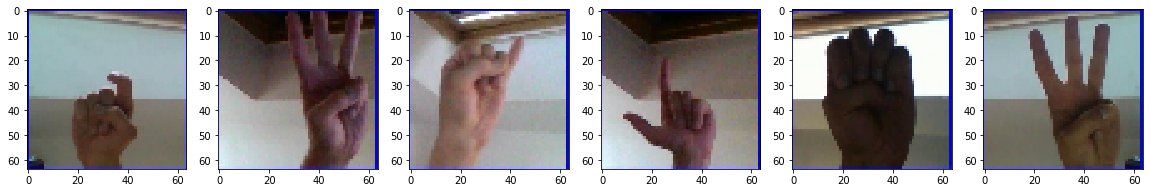

In [15]:
# Observar magens após pre processmento
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i])
#
#plt.figure(figsize=(20,10))
#for i in range(6):
#    plt.subplot(1,6,i+1)
#    plt.imshow(x_test[i])

In [7]:
# Iniciar CNN 
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 1024, activation='relu'))

cnn.add(tf.keras.layers.Dense(units = 29, activation='softmax'))

In [9]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
cnn_class = cnn.fit(x = training_set, validation_data= test_set, epochs=1)

2175/2175 [==============================] - 661s 303ms/step - loss: 1.4506 - accuracy: 0.5706 - val_loss: 1.2759 - val_accuracy: 0.6290


Acho que é um E.


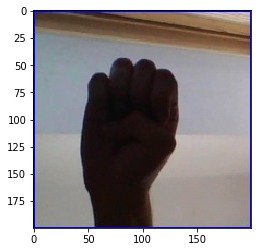

In [57]:

path = 'C:/Users/Jefferson/Google Drive/Machine learning/ManualAlphabet/Data/asl_alphabet_test/asl_alphabet_test/E_test.jpg'

test_image = image.load_img(path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

saida = np.where(result == 1)


for letra, i in training_set.class_indices.items():
    if saida[1][0] == i:
        prediction = letra

show = image.load_img(path)
plt.imshow(show)

print('Acho que é um '+ prediction+ '.')

Acho que é um M.


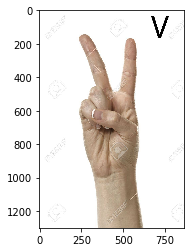

In [61]:
path = 'C:/Users/Jefferson/Google Drive/Machine learning/ManualAlphabet/Data/asl_alphabet_test/asl_alphabet_test/V_externo.jpg'

test_image = image.load_img(path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

saida = np.where(result == 1)


for letra, i in training_set.class_indices.items():
    if saida[1][0] == i:
        prediction = letra

show = image.load_img(path)
plt.imshow(show)

print('Acho que é um '+ prediction+ '.')

In [62]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)